In [23]:
import os
import numpy as nplief
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re
import random

### Carica gli insiemi di video creati in 'subset_creation.ipynb'

In [2]:
%store -r good_videos avg_videos bad_videos

In [25]:
OPENFACE_DIR = 'openFace/processed/'
MEDIAPIPE_DIR = 'mediaPipe/processed/'

video = good_videos[random.randint(0, len(good_videos))]
print("Numero di video in 'good_videos':", len(good_videos))
print("Numero di video in 'avg_videos':", len(avg_videos))
print("Numero di video in 'bad_videos':", len(bad_videos))
print(video)

Numero di video in 'good_videos': 172
Numero di video in 'avg_videos': 332
Numero di video in 'bad_videos': 111
godofwar_99


Video anomalo: godofwar_99 -> good_videos[141]

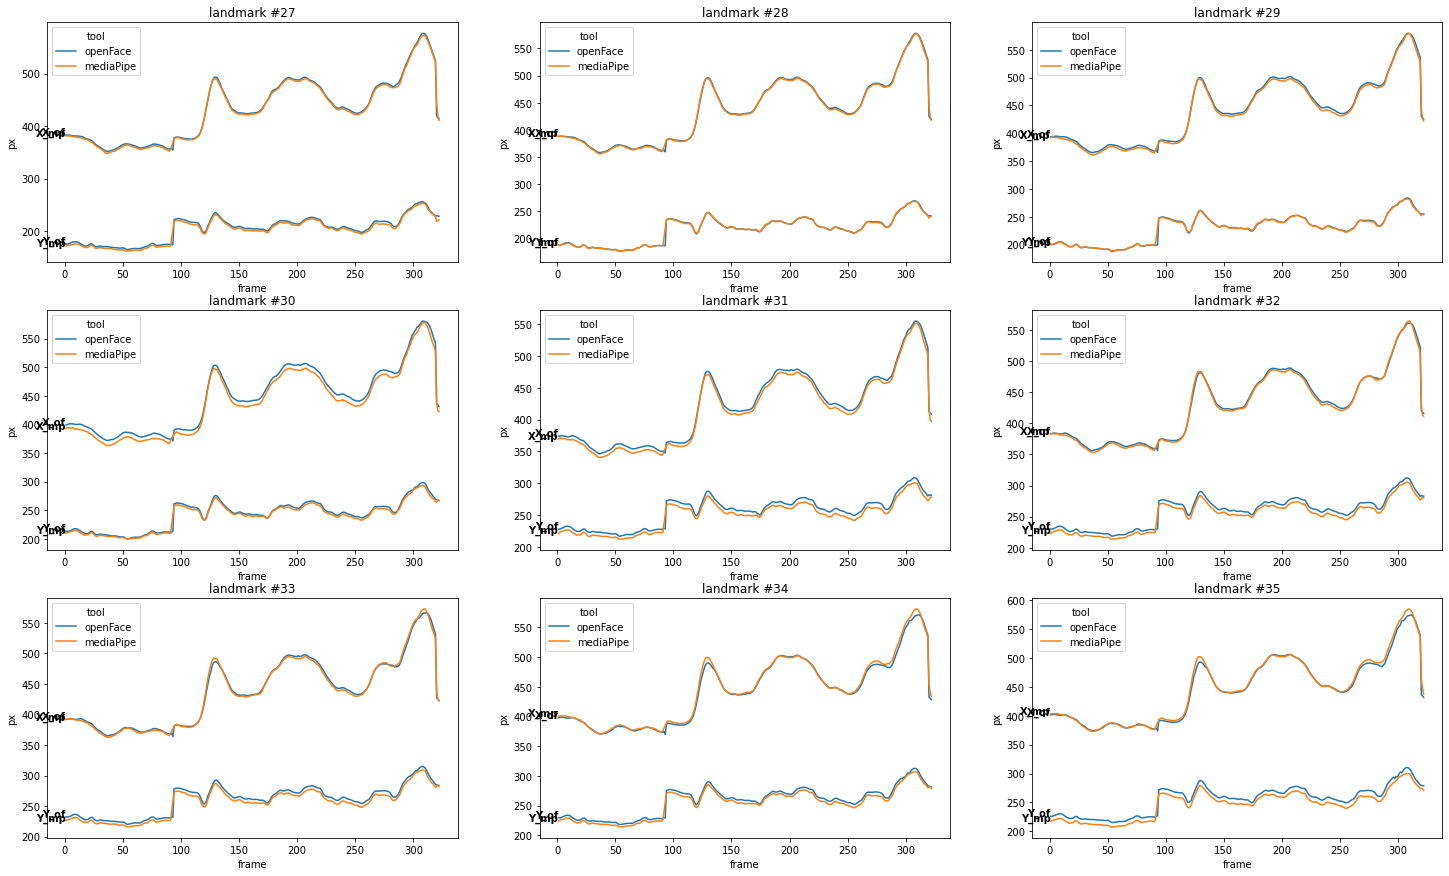

In [30]:
face_mesh = pd.read_csv('mediaPipe/faceMesh/face_mesh.csv')

openFace_nose_lndmks = [i for i in range(27, 36)]

fig, axes = plt.subplots(3, 3, figsize=(25, 15))
axes = axes.flatten()

for i, landmark in enumerate(openFace_nose_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X_of", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y_of", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X_mp", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y_mp", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

In [ ]:
x_regex_pat = re.compile(r'^x_[0-9]+$')
y_regex_pat = re.compile(r'^y_[0-9]+$')

fig, axes = plt.subplots(8, 5, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

for i, videoName in enumerate(small_videoList):
    videoCsv = base_dir + videoName + '/' + videoName + '.csv'
    df = pd.read_csv(videoCsv)
    df.columns = columns

    x_locs = df.columns[df.columns.str.contains(x_regex_pat)]
    y_locs = df.columns[df.columns.str.contains(y_regex_pat)]


    palette = sns.color_palette()
    avg_face_df = pd.DataFrame({'x_locs': df[x_locs].mean(axis=1), 'y_locs': df[y_locs].mean(axis=1)})
    sns.scatterplot(x='x_locs', y='y_locs', data=avg_face_df, marker='+', ax=axes[i])
    axes[i].set(xlim=[0, 1920], ylim=[1080, 0], title=videoName)
plt.tight_layout()
plt.show()